In [1]:
from CovidRawDataManager import CovidRawDataManager
import seaborn as sns

## Init manager (i.e. load data)

In [2]:
covid_raw_data_manager = CovidRawDataManager()

### Checkout total US cases data

In [3]:
covid_raw_data_manager.covid_us_df

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
1048,2022-12-04,98699619,1088997
1049,2022-12-05,98753618,1089181
1050,2022-12-06,98802023,1089662
1051,2022-12-07,98952019,1090599


In [4]:
covid_raw_data_manager.covid_us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1053 non-null   object
 1   cases   1053 non-null   int64 
 2   deaths  1053 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 24.8+ KB


In [5]:
covid_raw_data_manager.covid_us_df.describe()

,cases,deaths
count,1.053000e+03,1.053000e+03
mean,4.218558e+07,5.817863e+05
std,3.402184e+07,3.636399e+05
min,1.000000e+00,0.000000e+00
25%,7.770859e+06,2.141870e+05
50%,3.363976e+07,6.044600e+05
75%,7.964318e+07,9.701480e+05
max,9.910134e+07,1.092099e+06


### Plot generic trends in total US cases

<AxesSubplot: xlabel='date'>

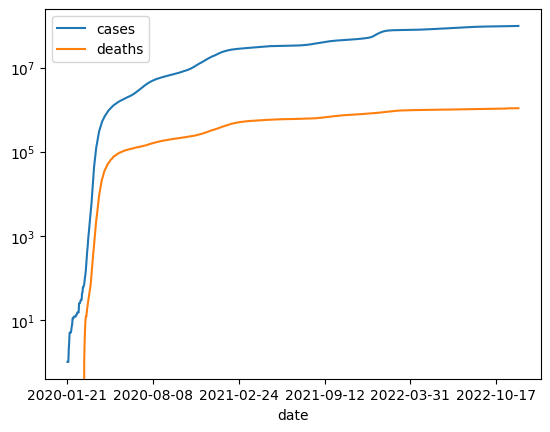

In [6]:
covid_raw_data_manager.covid_us_df.plot(x="date", y=["cases", "deaths"], logy=True)

### Checkout US state covid data

In [7]:
covid_raw_data_manager.covid_us_states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56062 entries, 0 to 56061
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    56062 non-null  object
 1   state   56062 non-null  object
 2   fips    56062 non-null  int64 
 3   cases   56062 non-null  int64 
 4   deaths  56062 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ MB


In [8]:
covid_raw_data_manager.covid_us_states_df.describe()

,fips,cases,deaths
count,56062.000000,5.606200e+04,56062.000000
mean,32.217777,7.923622e+05,10927.561325
std,18.775875,1.335000e+06,16376.656020
min,1.000000,1.000000e+00,0.000000
25%,17.000000,5.956000e+04,1002.000000
50%,31.000000,3.095610e+05,4526.500000
75%,46.000000,9.300782e+05,13785.500000
max,78.000000,1.161636e+07,100179.000000


In [9]:
covid_raw_data_manager.covid_us_states_df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
56057,2022-12-08,Virginia,51,2161493,22655
56058,2022-12-08,Washington,53,1866343,14862
56059,2022-12-08,West Virginia,54,616804,7765
56060,2022-12-08,Wisconsin,55,1936308,15747


### Process statewise trends

In [10]:
statewise_cases_df = covid_raw_data_manager.generate_statewise_history_data(states_df_label="cases")
statewise_cases_df

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-25,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04,1549285,300238,8263,2337547,971020,11540816,1711236,929619,317405,171608,...,2329549,7989541,1063566,146777,23445,2153223,1859858,615332,1929331,180925
2022-12-05,1549285,300238,8263,2337547,971190,11550859,1713488,929899,317885,171608,...,2329549,7990036,1063566,146777,23445,2156359,1859858,615922,1929331,180925
2022-12-06,1549285,300732,8263,2337547,971876,11554226,1714697,930723,317979,171608,...,2329549,7990671,1063566,146777,23445,2157930,1860880,616175,1933191,181695


In [11]:
statewise_cases_df.describe()

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,1.053000e+03,1053.000000,1053.000000,1.053000e+03,1053.000000,1.053000e+03,1.053000e+03,1053.000000,1053.000000,1053.000000,...,1.053000e+03,1.053000e+03,1.053000e+03,1053.000000,1053.000000,1.053000e+03,1.053000e+03,1053.000000,1.053000e+03,1053.000000
mean,6.903348e+05,118374.665717,1740.488129,1.056597e+06,436486.476733,4.805133e+06,7.065430e+05,399095.012346,135138.285850,70590.446344,...,1.043646e+06,3.586701e+06,4.867182e+05,51638.182336,8092.876543,8.778296e+05,7.156526e+05,241825.526116,8.413553e+05,80496.823362
std,5.334161e+05,109261.740220,3082.068977,8.127437e+05,339693.736272,3.944754e+06,5.967338e+05,315988.550745,110789.573776,59843.120605,...,8.101944e+05,2.767000e+06,3.768523e+05,55390.827047,8338.950375,7.341587e+05,6.600572e+05,219394.152174,6.651987e+05,65244.606753
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.645260e+05,10350.000000,0.000000,2.249850e+05,92220.000000,8.543030e+05,7.804700e+04,60038.000000,21998.000000,15918.000000,...,2.095930e+05,8.297580e+05,8.469700e+04,1857.000000,1326.000000,1.579050e+05,9.722300e+04,17913.000000,1.557520e+05,7455.000000
50%,5.509830e+05,70669.000000,0.000000,8.948750e+05,349385.000000,3.818311e+06,5.609270e+05,349352.000000,109744.000000,49347.000000,...,8.542110e+05,2.993964e+06,4.152100e+05,24410.000000,3858.000000,6.803400e+05,4.536300e+05,164041.000000,6.778330e+05,62290.000000
75%,1.291186e+06,243316.000000,1005.000000,1.992471e+06,830310.000000,9.064239e+06,1.337264e+06,731868.000000,258671.000000,135752.000000,...,1.969275e+06,6.633345e+06,9.266360e+05,114868.000000,15578.000000,1.659710e+06,1.445951e+06,496409.000000,1.580539e+06,155907.000000
max,1.555092e+06,300732.000000,8264.000000,2.353530e+06,973146.000000,1.161636e+07,1.716945e+06,932066.000000,318360.000000,172044.000000,...,2.339184e+06,8.018506e+06,1.066753e+06,147221.000000,23627.000000,2.161493e+06,1.866343e+06,616804.000000,1.936308e+06,181695.000000


In [12]:
statewise_deaths_df = covid_raw_data_manager.generate_statewise_history_data(states_df_label="deaths")
statewise_deaths_df

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04,21129,1390,34,31751,12594,99932,13651,11587,3172,1407,...,28023,92327,5127,770,124,22582,14739,7740,15684,1938
2022-12-05,21129,1390,34,31751,12594,99967,13671,11587,3172,1407,...,28023,92331,5127,770,124,22600,14739,7740,15684,1938
2022-12-06,21129,1390,34,31751,12603,99977,13687,11602,3172,1407,...,28023,92332,5127,770,124,22612,14750,7744,15714,1938


In [13]:
statewise_deaths_df.describe()

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,...,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000
mean,10936.635328,568.137702,7.101614,16931.693257,6226.394112,53910.739791,7126.836657,7432.754036,1682.318139,960.603039,...,13471.391263,50391.975309,2511.554606,325.842355,56.353276,11072.543210,6973.679962,3418.929725,7892.503324,908.804368
std,7554.330133,511.202815,13.248076,11175.315798,4429.807794,34864.840791,4642.959011,3381.491981,1051.929769,424.426305,...,10078.650770,33555.101687,1843.747859,258.721131,45.915845,7673.828133,4913.829771,2787.354145,5488.912118,732.506190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2664.000000,56.000000,0.000000,5759.000000,1552.000000,16568.000000,2121.000000,4530.000000,653.000000,636.000000,...,2729.000000,17019.000000,512.000000,58.000000,20.000000,3354.000000,2289.000000,381.000000,1470.000000,54.000000
50%,11352.000000,360.000000,0.000000,17936.000000,5909.000000,63648.000000,6947.000000,8278.000000,1694.000000,1141.000000,...,12466.000000,52518.000000,2371.000000,256.000000,30.000000,11415.000000,5984.000000,2891.000000,8128.000000,747.000000
75%,19038.000000,1166.000000,0.000000,28547.000000,11100.000000,88162.000000,12136.000000,10717.000000,2833.000000,1327.000000,...,25181.000000,86942.000000,4561.000000,611.000000,110.000000,19466.000000,12406.000000,6646.000000,13960.000000,1769.000000
max,21164.000000,1390.000000,34.000000,31824.000000,12622.000000,100179.000000,13724.000000,11603.000000,3172.000000,1487.000000,...,28124.000000,92450.000000,5138.000000,781.000000,126.000000,22655.000000,14862.000000,7765.000000,15747.000000,1939.000000


### plot few state trends

<AxesSubplot: xlabel='date', ylabel='cases'>

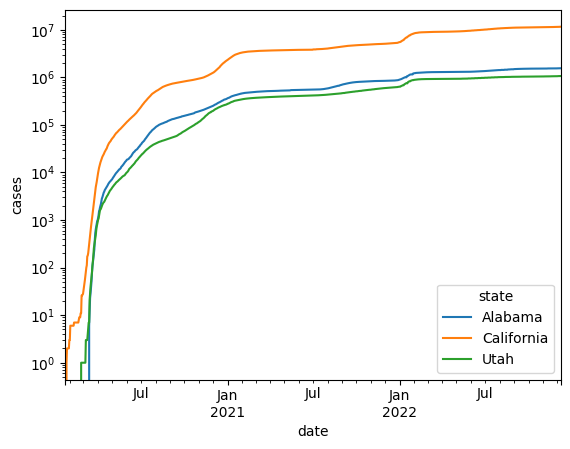

In [14]:
test_state_list = ["Alabama", "California", "Utah"]
statewise_cases_df.plot(y=test_state_list, logy=True, ylabel="cases")

<AxesSubplot: xlabel='date', ylabel='deaths'>

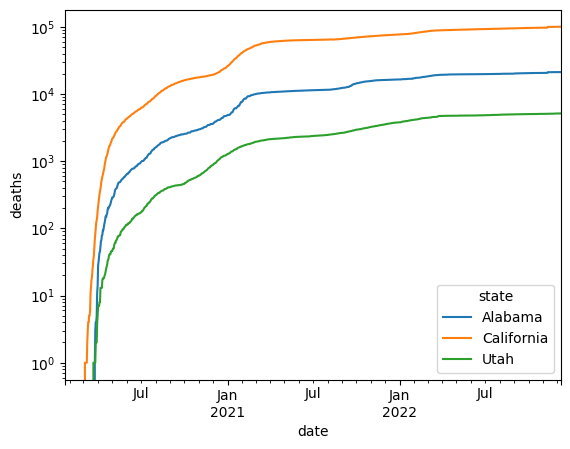

In [15]:
statewise_deaths_df.plot(y=test_state_list, logy=True, ylabel="deaths")

### check correlation between different states for cases and deaths

<AxesSubplot: xlabel='state', ylabel='state'>

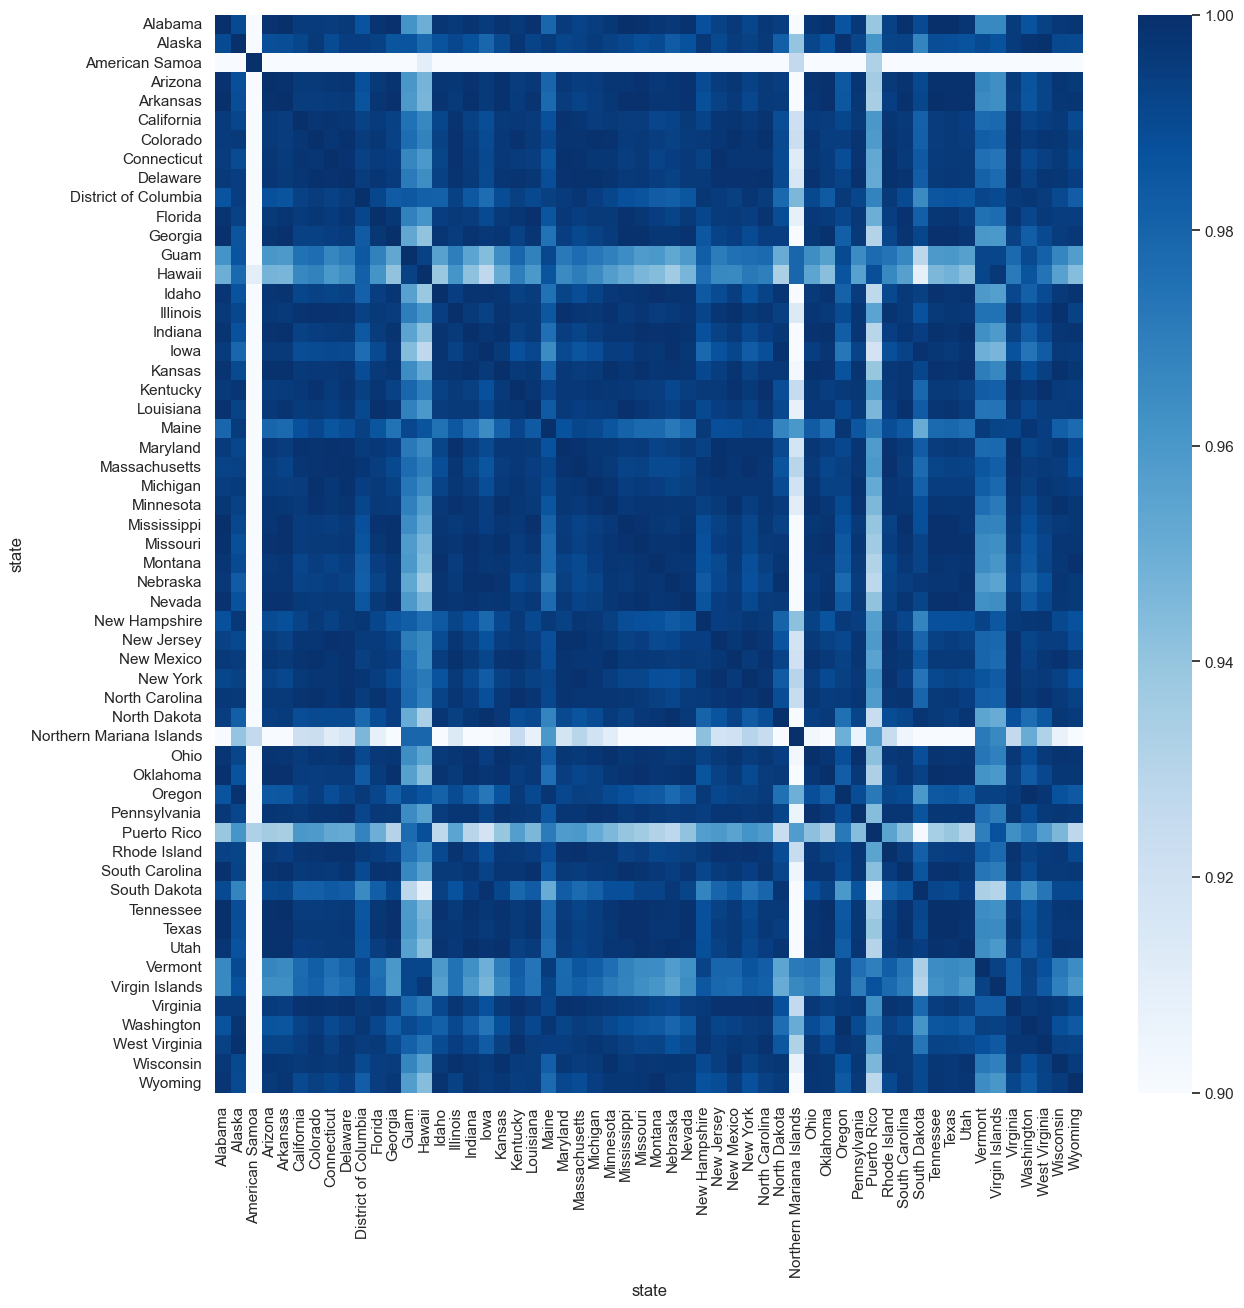

In [16]:
cases_statewise_corr_matrix = statewise_cases_df.corr()
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(cases_statewise_corr_matrix, xticklabels=cases_statewise_corr_matrix.columns, 
            yticklabels=cases_statewise_corr_matrix.columns, vmin=0.9, cmap="Blues")

<AxesSubplot: xlabel='state', ylabel='state'>

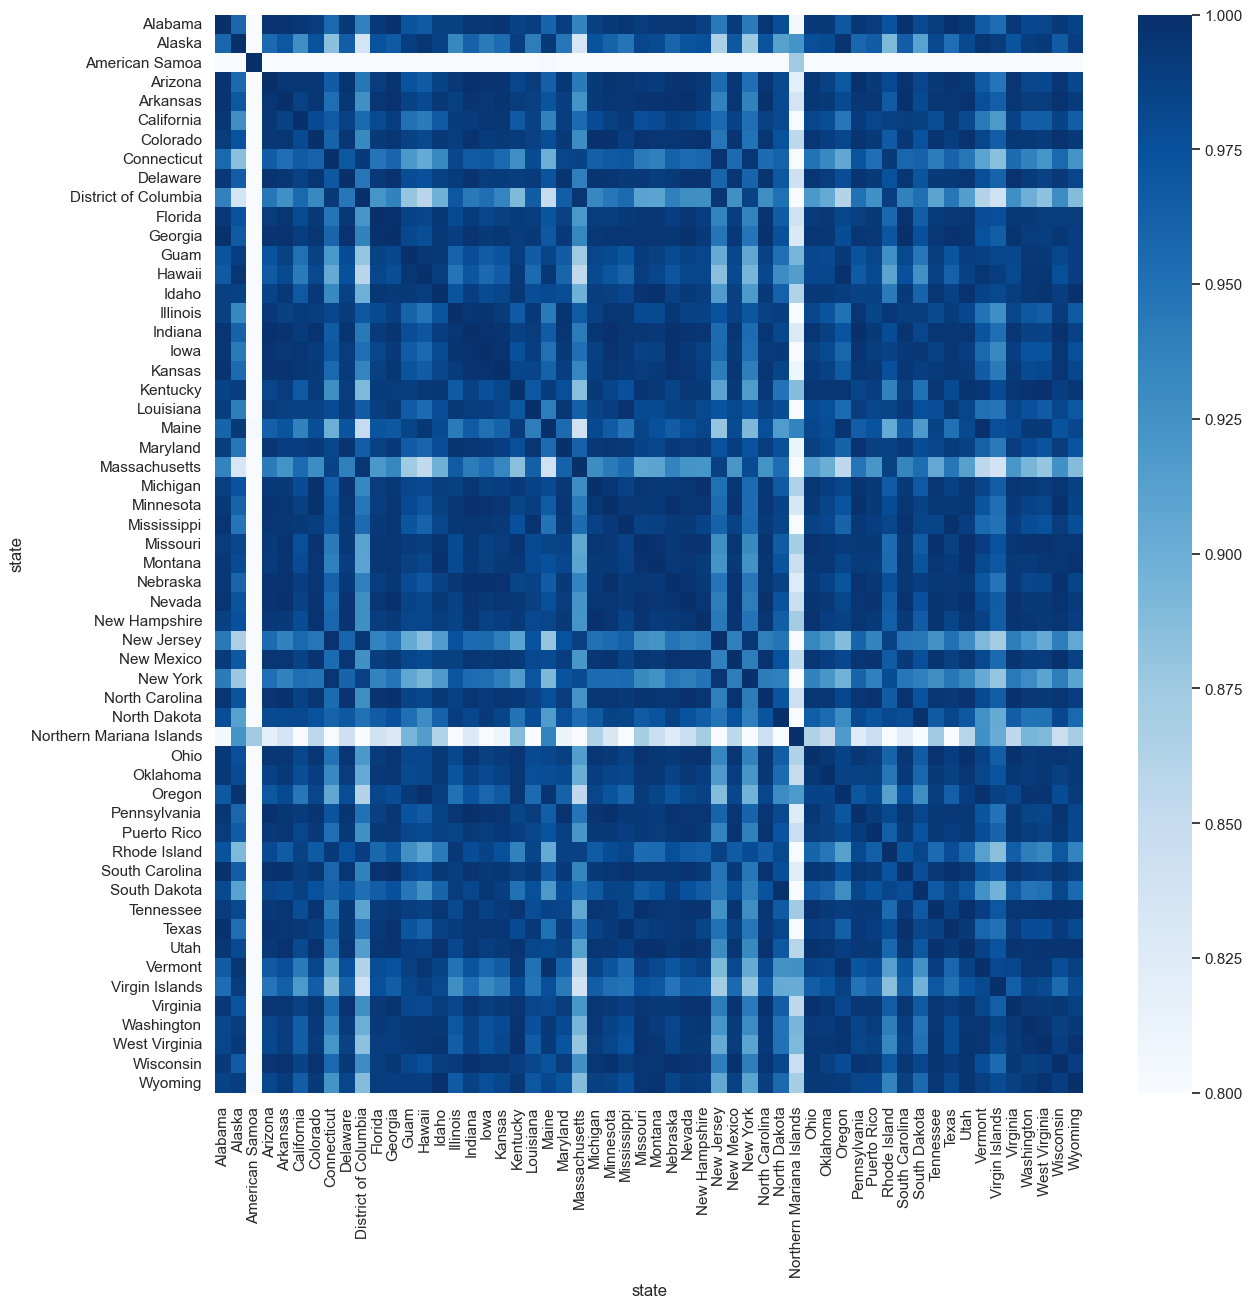

In [17]:
deaths_statewise_corr_matrix = statewise_deaths_df.corr()
sns.heatmap(deaths_statewise_corr_matrix, xticklabels=deaths_statewise_corr_matrix.columns, 
            yticklabels=deaths_statewise_corr_matrix.columns, vmin=0.8, cmap="Blues")

### Remove non mainland states to see correlations

In [18]:
exclude_states = [
    "Alaska",
    "Hawaii",
    "Guam",
    "Puerto Rico",
    "Virgin Islands",
    "Northern Mariana Islands",
    "American Samoa",
]
mainland_statewise_deaths_df = statewise_deaths_df.loc[:, ~statewise_deaths_df.columns.isin(exclude_states)]
mainland_statewise_cases_df = statewise_cases_df.loc[:, ~statewise_cases_df.columns.isin(exclude_states)]

<AxesSubplot: xlabel='state', ylabel='state'>

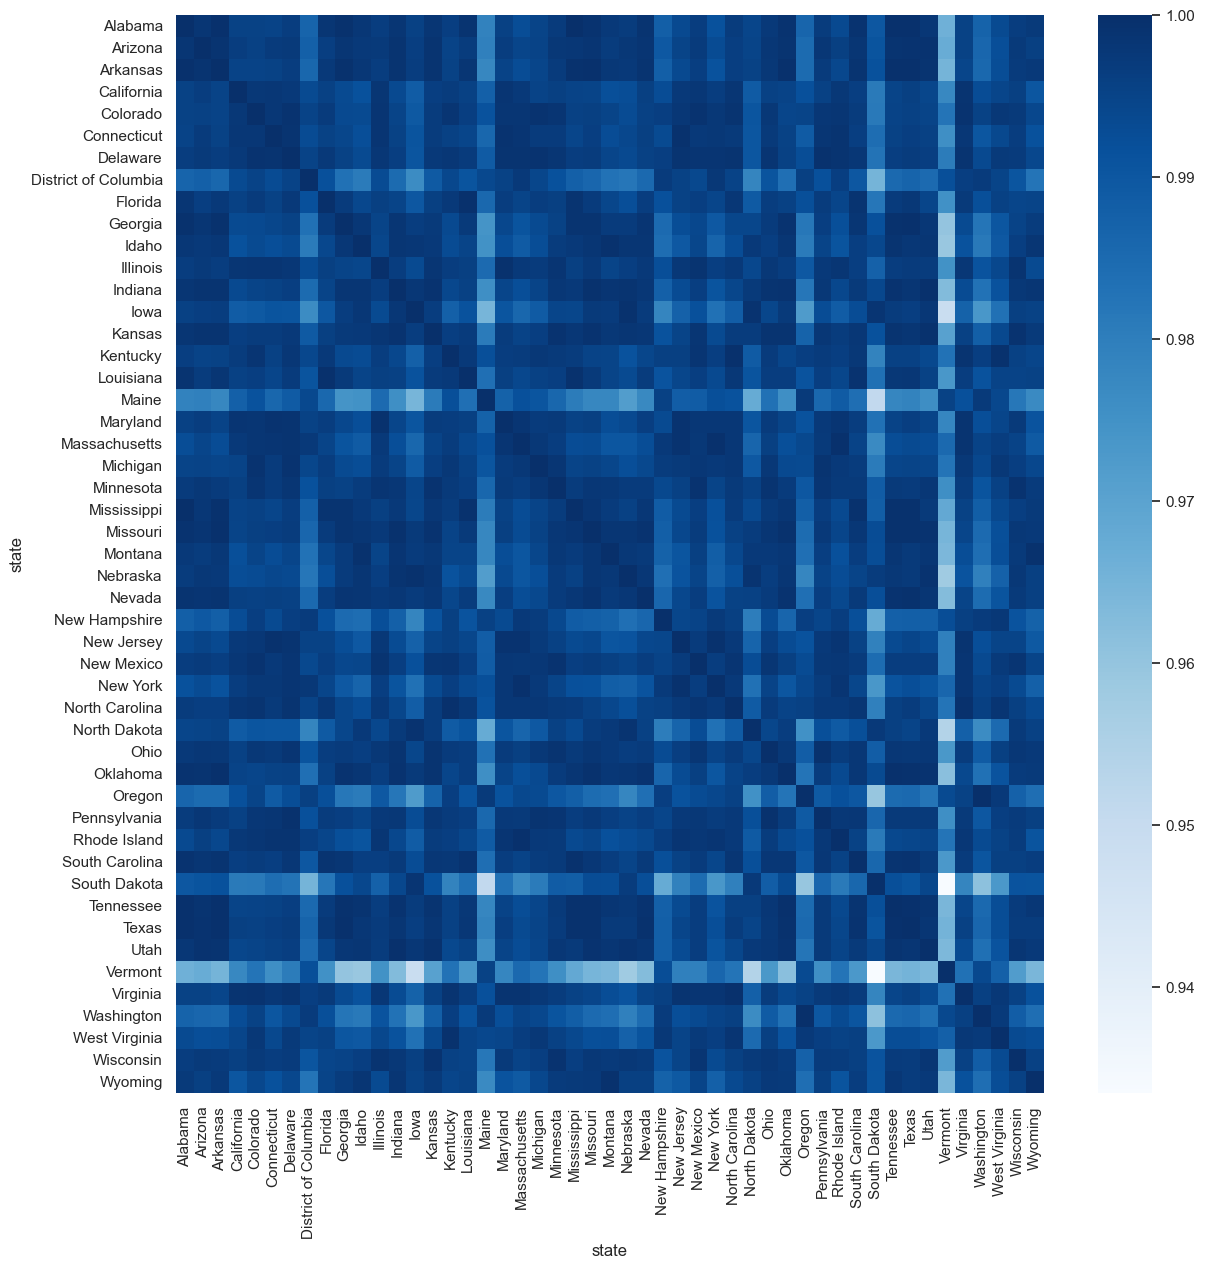

In [19]:
mainland_cases_statewise_corr_matrix = mainland_statewise_cases_df.corr()
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(mainland_cases_statewise_corr_matrix, xticklabels=mainland_cases_statewise_corr_matrix.columns, 
            yticklabels=mainland_cases_statewise_corr_matrix.columns, cmap="Blues")

<AxesSubplot: xlabel='state', ylabel='state'>

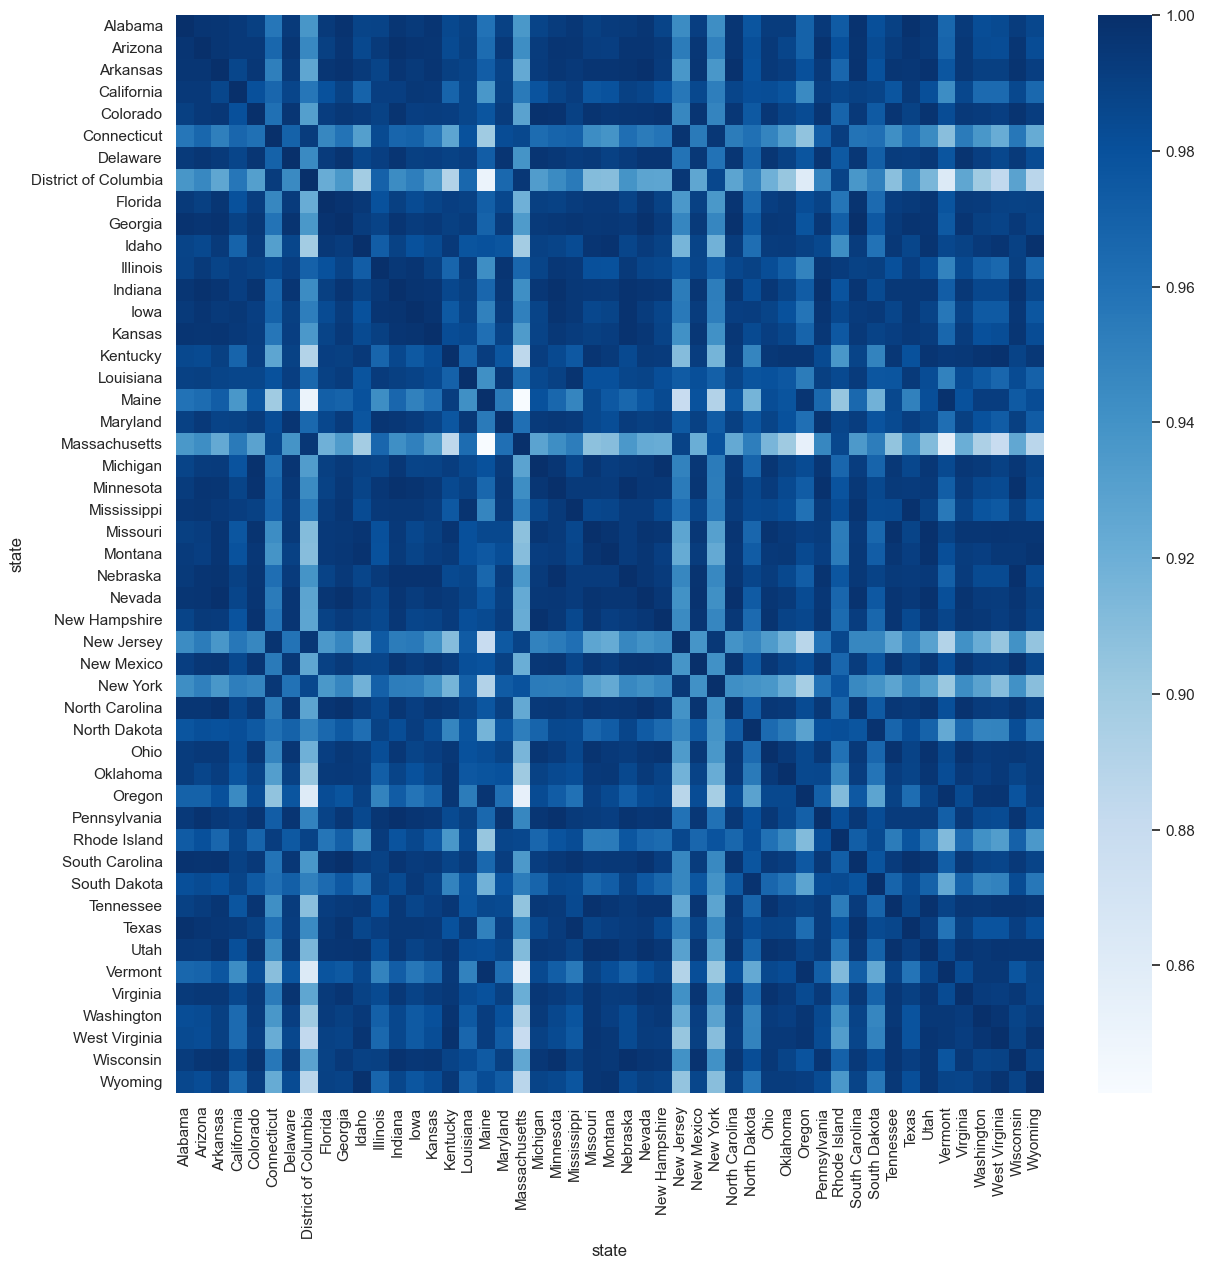

In [20]:
mainland_deaths_statewise_corr_matrix = mainland_statewise_deaths_df.corr()
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(mainland_deaths_statewise_corr_matrix, xticklabels=mainland_deaths_statewise_corr_matrix.columns, 
            yticklabels=mainland_deaths_statewise_corr_matrix.columns, cmap="Blues")

In [22]:
daily_statewise_cases_df = covid_raw_data_manager.generate_daily_statewise_data_from_history(
    statewise_history_df=statewise_cases_df)
daily_statewise_cases_df

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-02,0.0,0.0,0.0,0.0,754.0,4982.0,1753.0,1071.0,231.0,0.0,...,0.0,587.0,4396.0,0.0,0.0,1910.0,0.0,292.0,1445.0,0.0
2022-12-04,0.0,0.0,0.0,0.0,163.0,0.0,0.0,907.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-06,0.0,494.0,0.0,0.0,686.0,3367.0,1209.0,824.0,94.0,0.0,...,0.0,635.0,0.0,0.0,0.0,1571.0,1022.0,253.0,3860.0,770.0


<AxesSubplot: xlabel='date', ylabel='cases per day'>

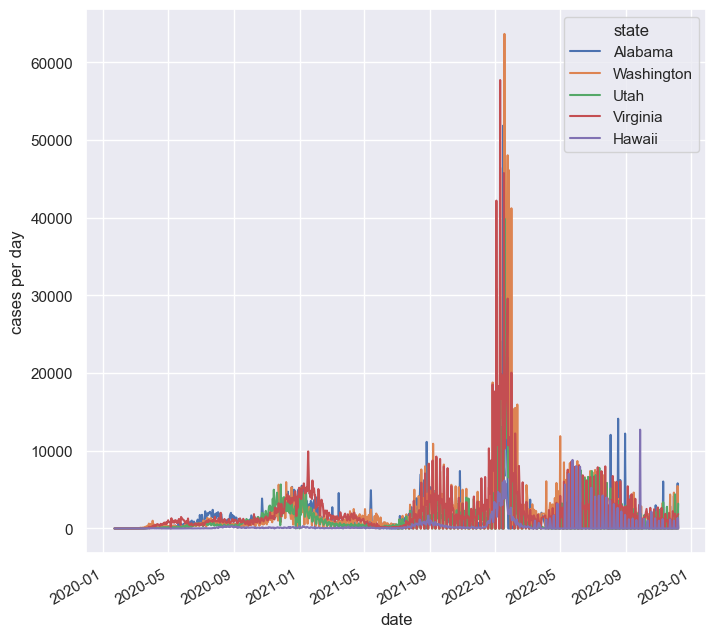

In [23]:
test_state_list = ["Alabama", "Washington", "Utah", "Virginia", "Hawaii"]
sns.set(rc={'figure.figsize':(8,8)})
daily_statewise_cases_df.plot(y=test_state_list, ylabel="cases per day")

In [24]:
daily_statewise_deaths_df = covid_raw_data_manager.generate_daily_statewise_data_from_history(
    statewise_history_df=statewise_deaths_df)
daily_statewise_deaths_df

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-05,0.0,0.0,0.0,0.0,0.0,35.0,20.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0
2022-12-06,0.0,0.0,0.0,0.0,9.0,10.0,16.0,15.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,12.0,11.0,4.0,30.0,0.0


<AxesSubplot: xlabel='date', ylabel='deaths per day'>

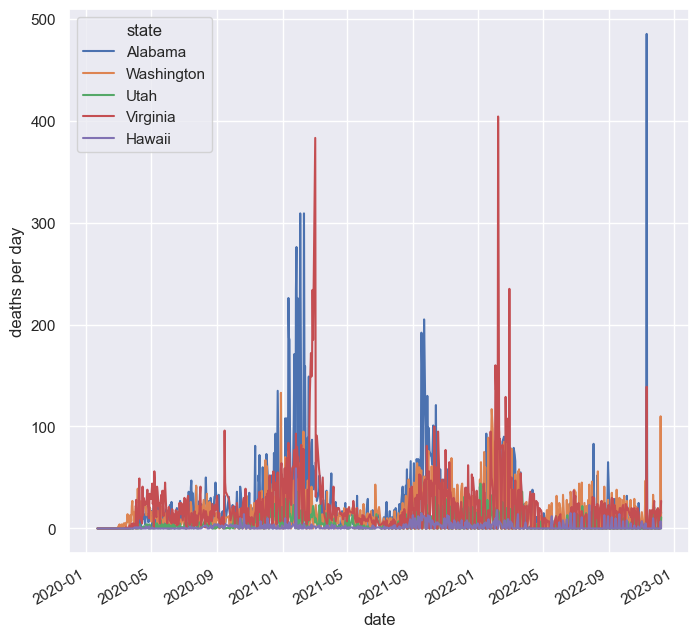

In [25]:
daily_statewise_deaths_df.plot(y=test_state_list, ylabel="deaths per day", kind="line")